<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.574135,33.248075,36.454734,0.011186,136.288129,136.276774,0.011355
1,0.0,1.0,56.882896,58.250262,32.120181,-0.000123,157.253216,157.253376,-0.000160
2,0.0,2.0,63.234630,47.838898,23.219116,0.005868,144.298512,144.292582,0.005930
3,0.0,3.0,78.252207,22.790373,94.858892,0.008605,205.910077,205.901220,0.008857
4,0.0,4.0,79.398338,96.895282,21.876907,-0.000837,208.169690,208.170856,-0.001166
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.141577,77.984197,83.395339,0.000731,250.521844,250.521506,0.000339
249996,999.0,246.0,50.303192,63.134365,78.135322,-0.000279,201.572599,201.573332,-0.000733
249997,999.0,247.0,43.056183,93.940172,47.191835,-0.000451,194.187739,194.188053,-0.000314
249998,999.0,248.0,77.551337,43.317717,87.840349,0.001534,218.710937,218.710387,0.000550


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.574135,33.248075,36.454734,0.011186,136.288129,136.276774,0.011355
1,0.0,1.0,56.882896,58.250262,32.120181,-0.000123,157.253216,157.253376,-0.000160
2,0.0,2.0,63.234630,47.838898,23.219116,0.005868,144.298512,144.292582,0.005930
3,0.0,3.0,78.252207,22.790373,94.858892,0.008605,205.910077,205.901220,0.008857
4,0.0,4.0,79.398338,96.895282,21.876907,-0.000837,208.169690,208.170856,-0.001166
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.141577,77.984197,83.395339,0.000731,250.521844,250.521506,0.000339
249996,999.0,246.0,50.303192,63.134365,78.135322,-0.000279,201.572599,201.573332,-0.000733
249997,999.0,247.0,43.056183,93.940172,47.191835,-0.000451,194.187739,194.188053,-0.000314
249998,999.0,248.0,77.551337,43.317717,87.840349,0.001534,218.710937,218.710387,0.000550


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    56.574135  33.248075  36.454734  0.011186  136.288129   
      1.0    56.882896  58.250262  32.120181 -0.000123  157.253216   
      2.0    63.234630  47.838898  23.219116  0.005868  144.298512   
      3.0    78.252207  22.790373  94.858892  0.008605  205.910077   
      4.0    79.398338  96.895282  21.876907 -0.000837  208.169690   
...                ...        ...        ...       ...         ...   
999.0 245.0  79.141577  77.984197  83.395339  0.000731  250.521844   
      246.0  50.303192  63.134365  78.135322 -0.000279  201.572599   
      247.0  43.056183  93.940172  47.191835 -0.000451  194.187739   
      248.0  77.551337  43.317717  87.840349  0.001534  218.710937   
      249.0  42.765589  35.287528  78.038801 -0.000310  166.091608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    136.276774  0.011355  
      1.0    157.253376 -0.000160  
      2.0    144.292582  0.005930  
      3.0    205.901220  0.008857  
      4.0    208.170856 -0.001166  
...                 ...       ...  
999.0 245.0  250.521506  0.000339  
      246.0  201.573332 -0.000733  
      247.0  194.188053 -0.000314  
      248.0  218.710387  0.000550  
      249.0  166.092804 -0.001195  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    56.574135  33.248075  36.454734  0.011186  136.288129   
      1.0    56.882896  58.250262  32.120181 -0.000123  157.253216   
      2.0    63.234630  47.838898  23.219116  0.005868  144.298512   
      3.0    78.252207  22.790373  94.858892  0.008605  205.910077   
      4.0    79.398338  96.895282  21.876907 -0.000837  208.169690   
...                ...        ...        ...       ...         ...   
999.0 245.0  79.141577  77.984197  83.395339  0.000731  250.521844   
      246.0  50.303192  63.134365  78.135322 -0.000279  201.572599   
      247.0  43.056183  93.940172  47.191835 -0.000451  194.187739   
      248.0  77.551337  43.317717  87.840349  0.001534  218.710937   
      249.0  42.765589  35.287528  78.038801 -0.000310  166.091608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    136.276774  0.011355  
      1.0    157.253376 -0.000160  
      2.0    144.292582  0.005930  
      3.0    205.901220  0.008857  
      4.0    208.170856 -0.001166  
...                 ...       ...  
999.0 245.0  250.521506  0.000339  
      246.0  201.573332 -0.000733  
      247.0  194.188053 -0.000314  
      248.0  218.710387  0.000550  
      249.0  166.092804 -0.001195  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.574135,33.248075,36.454734,0.011186,136.288129,136.276774,0.011355
1,0.0,1.0,56.882896,58.250262,32.120181,-0.000123,157.253216,157.253376,-0.000160
2,0.0,2.0,63.234630,47.838898,23.219116,0.005868,144.298512,144.292582,0.005930
3,0.0,3.0,78.252207,22.790373,94.858892,0.008605,205.910077,205.901220,0.008857
4,0.0,4.0,79.398338,96.895282,21.876907,-0.000837,208.169690,208.170856,-0.001166
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.141577,77.984197,83.395339,0.000731,250.521844,250.521506,0.000339
249996,999.0,246.0,50.303192,63.134365,78.135322,-0.000279,201.572599,201.573332,-0.000733
249997,999.0,247.0,43.056183,93.940172,47.191835,-0.000451,194.187739,194.188053,-0.000314
249998,999.0,248.0,77.551337,43.317717,87.840349,0.001534,218.710937,218.710387,0.000550


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    56.574135  33.248075  36.454734  0.011186  136.288129   
      1.0    56.882896  58.250262  32.120181 -0.000123  157.253216   
      2.0    63.234630  47.838898  23.219116  0.005868  144.298512   
      3.0    78.252207  22.790373  94.858892  0.008605  205.910077   
      4.0    79.398338  96.895282  21.876907 -0.000837  208.169690   
...                ...        ...        ...       ...         ...   
999.0 245.0  79.141577  77.984197  83.395339  0.000731  250.521844   
      246.0  50.303192  63.134365  78.135322 -0.000279  201.572599   
      247.0  43.056183  93.940172  47.191835 -0.000451  194.187739   
      248.0  77.551337  43.317717  87.840349  0.001534  218.710937   
      249.0  42.765589  35.287528  78.038801 -0.000310  166.091608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    136.276774  0.011355  
      1.0    157.253376 -0.000160  
      2.0    144.292582  0.005930  
      3.0    205.901220  0.008857  
      4.0    208.170856 -0.001166  
...                 ...       ...  
999.0 245.0  250.521506  0.000339  
      246.0  201.573332 -0.000733  
      247.0  194.188053 -0.000314  
      248.0  218.710387  0.000550  
      249.0  166.092804 -0.001195  

[250000 rows x 7 columns]

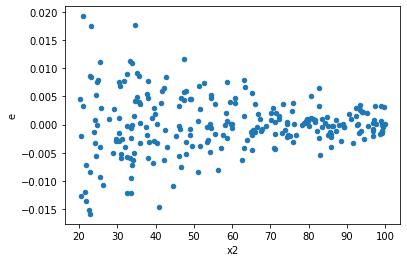

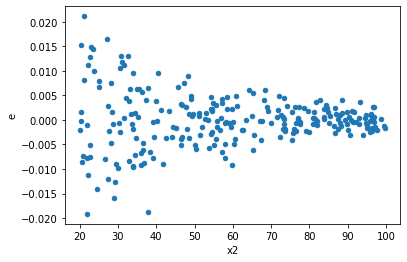

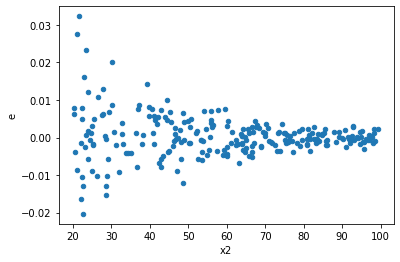

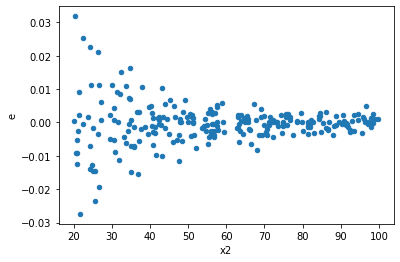

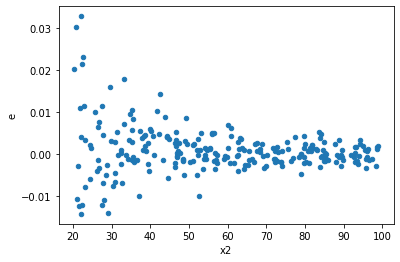

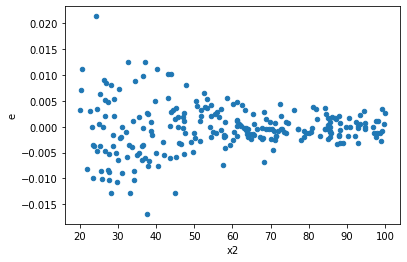

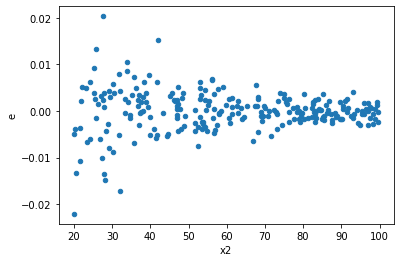

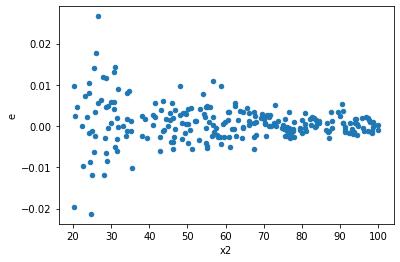

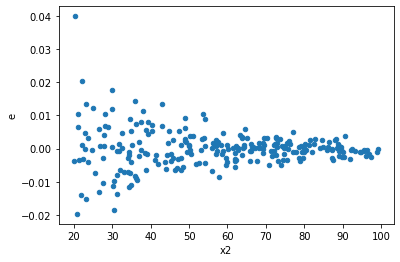

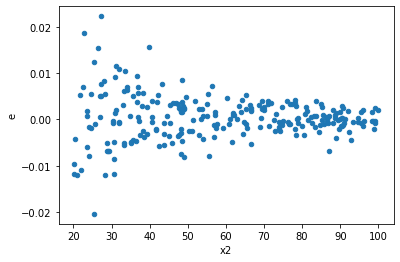

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
155.0,97.0,97.0,0.00260536532383873,0.0028705367956357356,2.6859436328234328e-05,2.9593162841605522e-05,1.1017789978897485,0.6340854539226586,0.6829572730386707,0.3170427269613293,Reject001=1 : Homoscedasticity
234.0,97.0,97.0,0.0046337520184466605,0.005046638847753845,4.777063936542949e-05,5.202720461601902e-05,1.0891042135322542,0.6750831838838491,0.6624584080580754,0.33754159194192457,Reject001=1 : Homoscedasticity
467.0,97.0,97.0,0.0022967146689058153,0.002355713580389969,2.3677470813462012e-05,2.4285707014329578e-05,1.025688394071285,0.90085605445914,0.54957197277043,0.45042802722957,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.003880191529914017,0.001232355671508851,4.000197453519605e-05,1.2704697644421144e-05,0.31760176321403377,4.018792045870629e-08,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,0.004996969600268187,0.0007184714175066627,5.151515051822873e-05,7.406921829965595e-06,0.14378142654061823,5.236437942754447e-19,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,0.006159078807011371,0.0008901141077117285,6.349565780424094e-05,9.176434100120913e-06,0.1445206557023496,6.316364733699111e-19,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,0.006453981305224888,0.0017988296456976404,6.653588974458648e-05,1.8544635522656087e-05,0.2787162776937979,1.203207060087101e-09,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,0.00526576997600252,0.001840331732113876,5.4286288412397116e-05,1.8972492083648207e-05,0.3494895790170754,4.374313235132923e-07,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,0.003667592591568396,0.0007302246756419458,3.781023290276697e-05,7.528089439607689e-06,0.19910190606249292,4.299826714092857e-14,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,0.003334201583357407,0.0009107830289829233,3.437321219956089e-05,9.38951576271055e-06,0.27316375636346546,6.837333413447792e-10,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,0.003554223124995387,0.0006482112367420316,3.664147551541636e-05,6.68259006950548e-06,0.18237775568546302,2.304956160172882e-15,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,0.006724198729278727,0.0009528691754632101,6.932163638431677e-05,9.823393561476393e-06,0.1417074678822617,3.073820252748209e-19,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    984
Reject001=1 : Homoscedasticity       16
Name: Result_test, dtype: int64